In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd '/content/drive/MyDrive/CV-crowd-flow-estimation-/notebooks'
!pwd

In [1]:
import sys
import os
import torch
import matplotlib.pyplot as plt
# Add project root to sys.path (one directory up from the notebook)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.data_loader import ShanghaiTechDataModule
from src.train import train_model
from src.utils import plot_density_predictions, get_model

### Resnet Density Map

Using Apple MPS
Using Apple MPS


Epoch 1/15 [Train]:   0%|          | 0/34 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[resnet50] Epoch 1/15  Train MSE: 0.009544, MAE: 0.003033  Val   MSE: 0.000957, MAE: 0.001125


[resnet50] Epoch 2/15  Train MSE: 0.000775, MAE: 0.001079  Val   MSE: 0.000636, MAE: 0.000941


[resnet50] Epoch 3/15  Train MSE: 0.000604, MAE: 0.000969  Val   MSE: 0.000609, MAE: 0.000863


[resnet50] Epoch 4/15  Train MSE: 0.000501, MAE: 0.000865  Val   MSE: 0.000576, MAE: 0.000835


[resnet50] Epoch 5/15  Train MSE: 0.000523, MAE: 0.000908  Val   MSE: 0.000488, MAE: 0.000731


[resnet50] Epoch 6/15  Train MSE: 0.000431, MAE: 0.000824  Val   MSE: 0.000465, MAE: 0.000770


[resnet50] Epoch 7/15  Train MSE: 0.000349, MAE: 0.000771  Val   MSE: 0.000394, MAE: 0.000693


[resnet50] Epoch 8/15  Train MSE: 0.000330, MAE: 0.000727  Val   MSE: 0.000453, MAE: 0.000704


[resnet50] Epoch 9/15  Train MSE: 0.000321, MAE: 0.000750  Val   MSE: 0.000488, MAE: 0.000785


[resnet50] Epoch 10/15  Train MSE: 0.000267, MAE: 0.000680  Val   MSE: 0.000422, MAE: 0.000661


[resnet50] Epoch 11/15  Train MSE: 0.000234, MAE: 0.000655  Val   MSE: 0.000423, MAE: 0.000684


[resnet50] Epoch 12/15  Train MSE: 0.000241, MAE: 0.000622  Val   MSE: 0.000430, MAE: 0.000641


[resnet50] Epoch 13/15  Train MSE: 0.000210, MAE: 0.000626  Val   MSE: 0.000376, MAE: 0.000608


[resnet50] Epoch 14/15  Train MSE: 0.000185, MAE: 0.000603  Val   MSE: 0.000463, MAE: 0.000730


[resnet50] Epoch 15/15  Train MSE: 0.000183, MAE: 0.000597  Val   MSE: 0.000365, MAE: 0.000635
Saved weights to ../models/pth/part_A_resnet50_15.pth


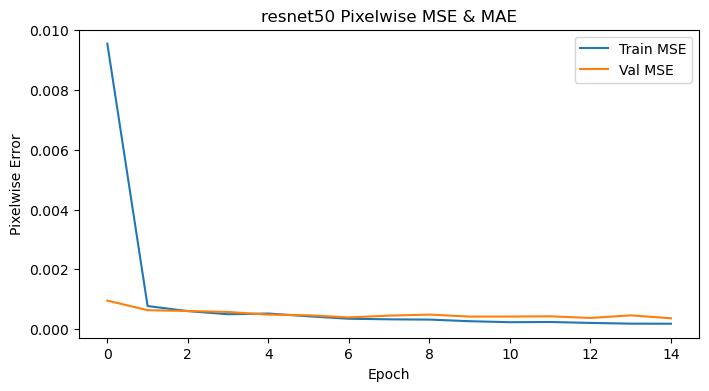

In [2]:
# 1) Prepare the data
data_module = ShanghaiTechDataModule(
    data_folder="../data/ShanghaiTech",
    part="part_A",
    validation_split=0.1,
    sigma=5,
    return_count=False,
    batch_size=8,
    num_workers=4,
    input_size=(384, 384),
    density_map_size=(192, 192),
)

# 2) Train the model (15 epochs)
model = train_model(
    data_module,
    model_name="resnet50",
    epochs=15,
    lr=1e-4,
    pretrained=True,
    save_path="../models/pth/part_A_resnet50_15.pth"
)


/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


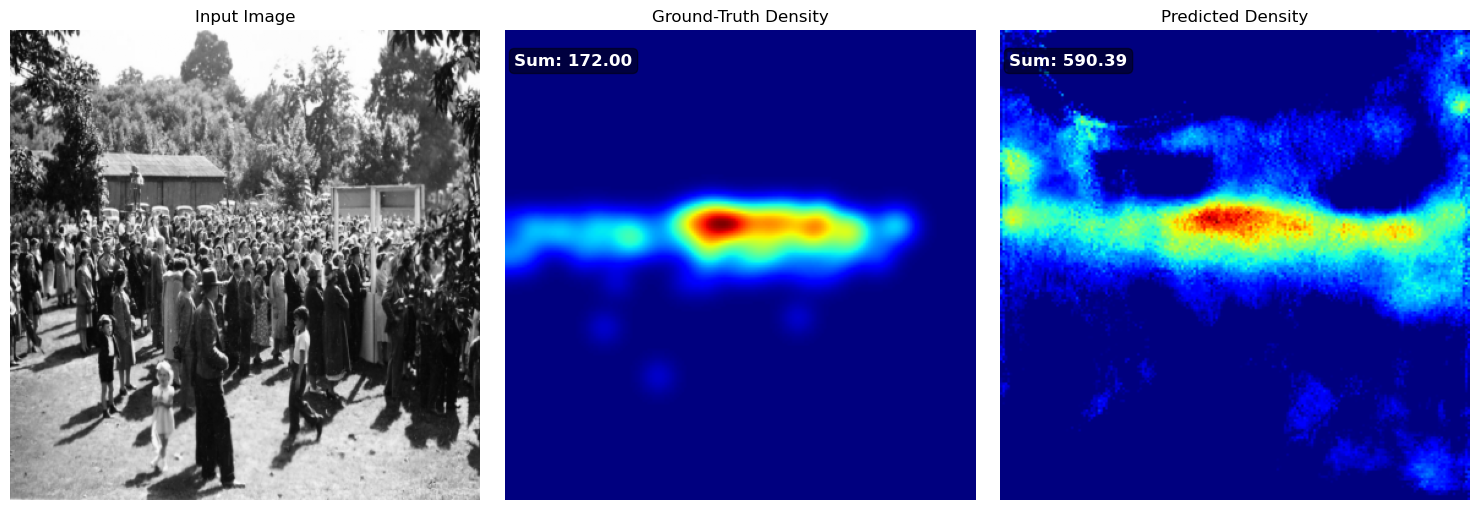

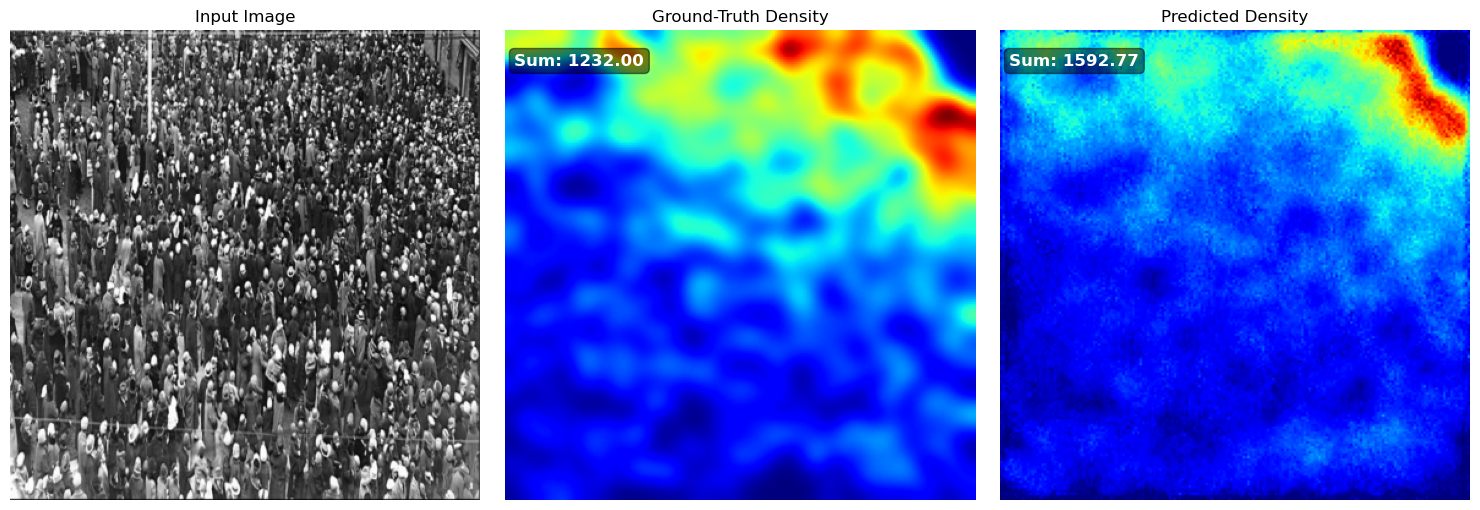

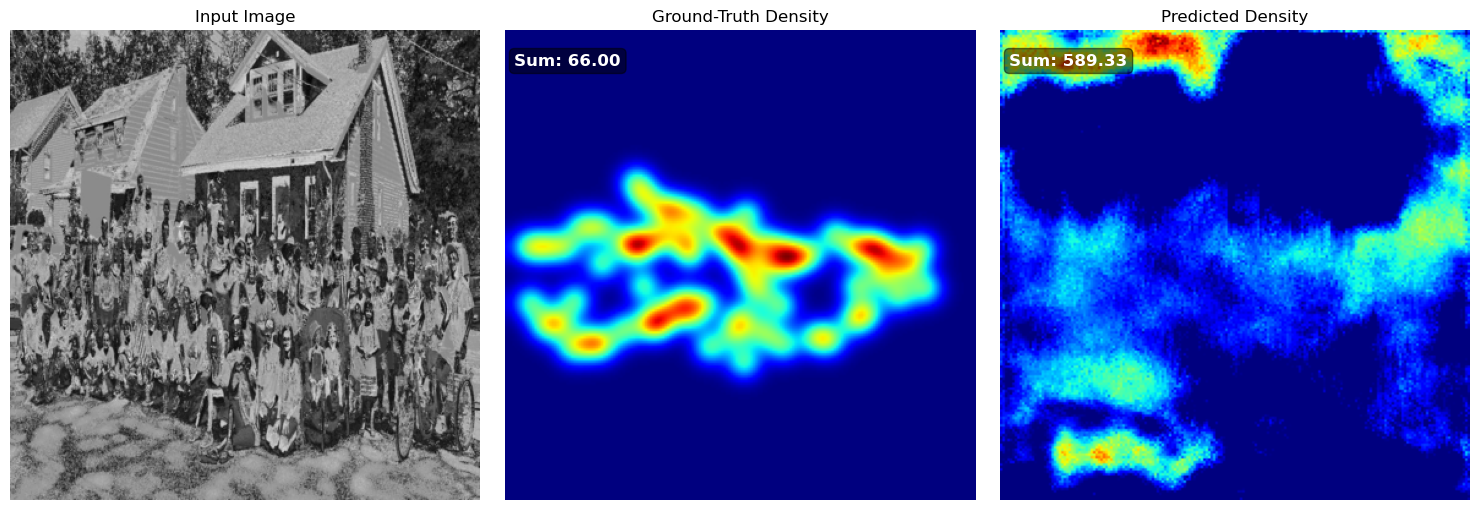

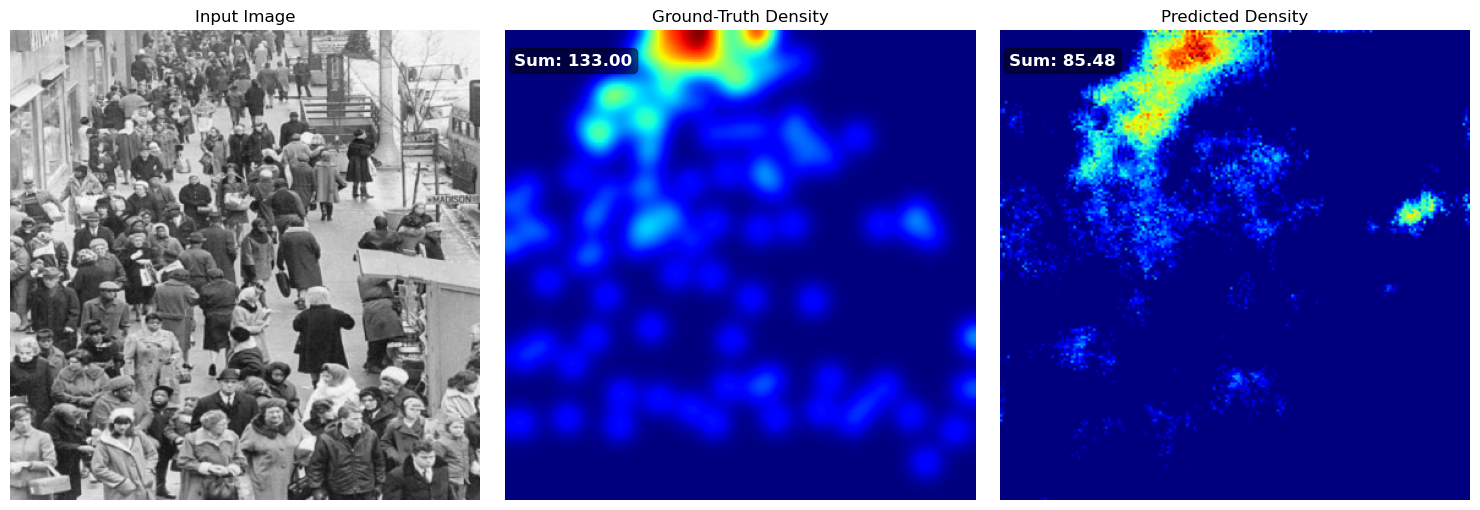

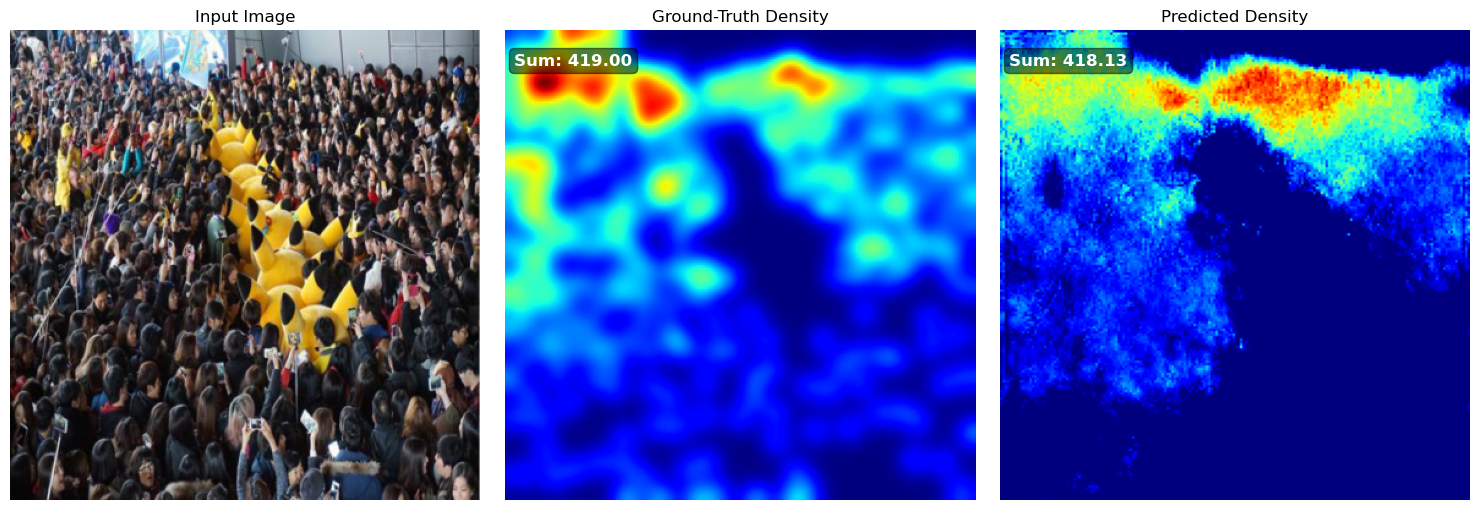

In [5]:
plot_density_predictions(
    model,
    data_module.test_dataloader(),
    device = "mps",
)

### VGG19bn Density map

In [ ]:
# 2) Train the model (15 epochs)
model = train_model(
    data_module,
    model_name="vgg19_bn",
    epochs=10,
    lr=1e-4,
    pretrained=True,
    save_path="../models/pth/part_A_vgg19.pth"
)


In [ ]:
plot_density_predictions(
    model,
    data_module.test_dataloader(),
    device = "mps",
)